# Etude  Virus Corona

On commence par lire le tableau des résultats publié sur la page https://www.worldometers.info/coronavirus/

Pour éviter de se faire bloquer comme 'Robot' on va devoir prétendre être un navigateur Web, d'où l'utilisation de 'requests'

In [1]:
import pandas as pd
import requests

# Pretend to be a browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url, headers=header)

df = pd.read_html(r.text)[0]


In [2]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,World,1621348,"+17,696",97179.0,"+1,487",366215.0,1157954,49193.0,208.00,12.5,NaN,NaN
1,USA,468895,+329,16697.0,+6,25928.0,426270,10011.0,1417.00,50.0,2376977.0,7181.0
2,Spain,157022,"+3,800",15843.0,+396,55668.0,85511,7371.0,3358.00,339.0,355000.0,7593.0
3,Italy,143626,NaN,18279.0,NaN,28470.0,96877,3605.0,2375.00,302.0,853369.0,14114.0
4,Germany,118235,NaN,2607.0,NaN,52407.0,63221,4895.0,1411.00,31.0,1317887.0,15730.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Timor-Leste,2,+1,NaN,NaN,1.0,1,NaN,2.00,NaN,NaN,NaN
210,Saint Pierre Miquelon,1,NaN,NaN,NaN,NaN,1,NaN,173.00,NaN,NaN,NaN
211,Yemen,1,+1,NaN,NaN,NaN,1,NaN,0.03,NaN,NaN,NaN
212,China,81907,+42,3336.0,+1,77455.0,1116,144.0,57.00,2.0,NaN,NaN


Le tableau est très bien, mais le nom de la première colonne ne nous convient pas, on va le renommer.


In [3]:
new_cols = df.columns.values
new_cols[0] = 'Countries'
df.columns = new_cols

df['DeathRate'] = df['TotalDeaths']/df['TotalCases']
# df['DeathRate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['DeathRate']], index = df.index)
#df['DeathRate'] = pd.Series(["{0:.2f}".format(val * 100) for val in df['DeathRate']], index = df.index)
df

,Countries,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,DeathRate
0,World,1621348,"+17,696",97179.0,"+1,487",366215.0,1157954,49193.0,208.00,12.5,NaN,NaN,0.059937
1,USA,468895,+329,16697.0,+6,25928.0,426270,10011.0,1417.00,50.0,2376977.0,7181.0,0.035609
2,Spain,157022,"+3,800",15843.0,+396,55668.0,85511,7371.0,3358.00,339.0,355000.0,7593.0,0.100897
3,Italy,143626,NaN,18279.0,NaN,28470.0,96877,3605.0,2375.00,302.0,853369.0,14114.0,0.127268
4,Germany,118235,NaN,2607.0,NaN,52407.0,63221,4895.0,1411.00,31.0,1317887.0,15730.0,0.022049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Timor-Leste,2,+1,NaN,NaN,1.0,1,NaN,2.00,NaN,NaN,NaN,NaN
210,Saint Pierre Miquelon,1,NaN,NaN,NaN,NaN,1,NaN,173.00,NaN,NaN,NaN,NaN
211,Yemen,1,+1,NaN,NaN,NaN,1,NaN,0.03,NaN,NaN,NaN,NaN
212,China,81907,+42,3336.0,+1,77455.0,1116,144.0,57.00,2.0,NaN,NaN,0.040729


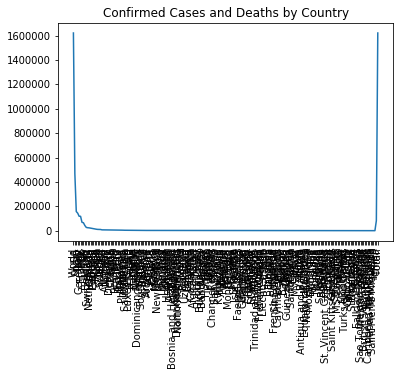

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df.Countries, df.TotalCases)


ValueError: x and y must have same first dimension, but have shapes (86,) and (87,)

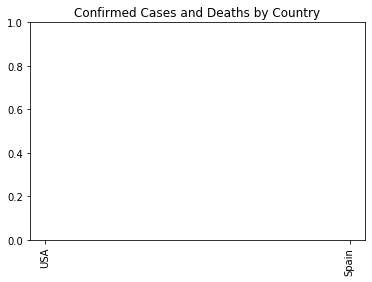

In [5]:
top50 = df['TotalCases'] > 500
nototal = df['Countries'] != 'Total:'
noworld = df['Countries'] != 'World'

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df[top50 & nototal & noworld].Countries, df[top50 & nototal].TotalCases)


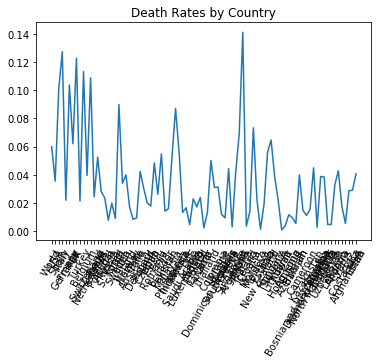

In [6]:
plt.figure()
plt.title('Death Rates by Country')
plt.xticks(rotation=60)
plt.plot(df[top50 & nototal].Countries, df[top50 & nototal].DeathRate)

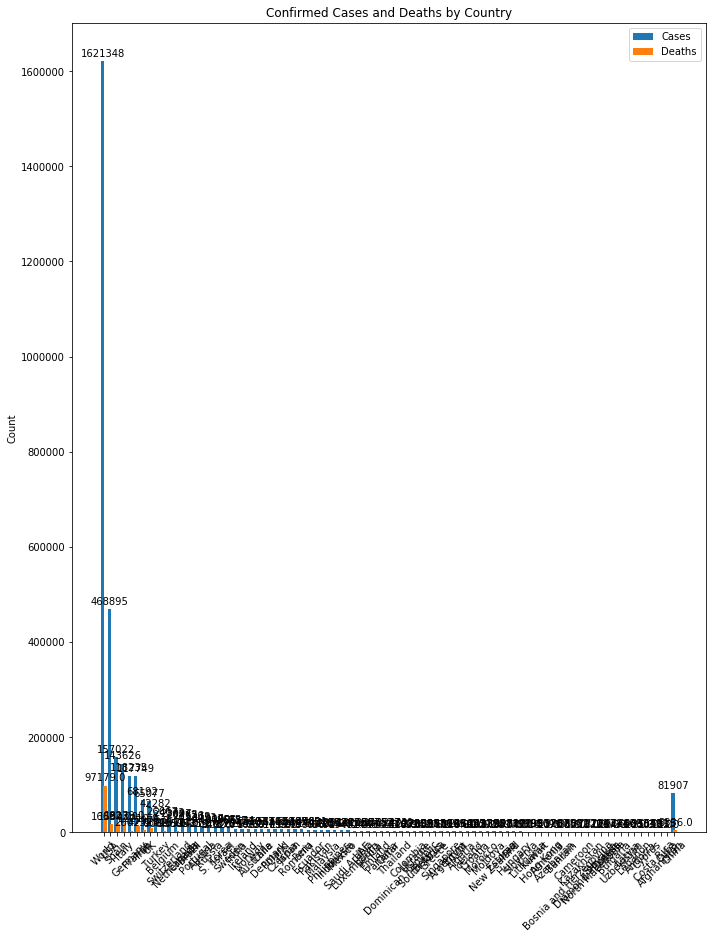

In [11]:
import numpy as np

x = np.arange(len(df[top50 & nototal].Countries))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10,12))
rects1 = ax.bar(x - width/3, df[top50 & nototal].TotalCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df[top50 & nototal].TotalDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths by Country')
ax.set_xticks(x)
ax.set_xticklabels(df[top50 & nototal].Countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.xticks(rotation=45)

plt.show()

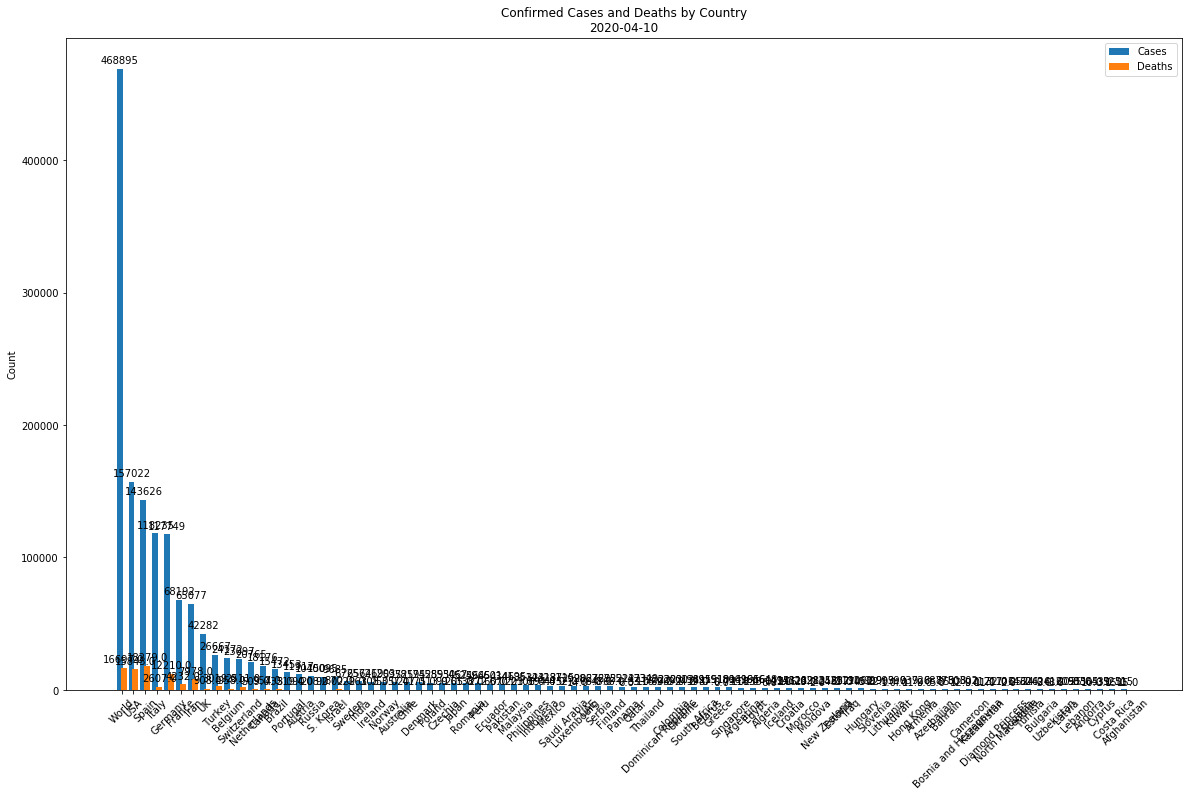

In [10]:
from datetime import date
today = date.today()

nochina = df['Countries'] != 'China'
noworld = df['Countries'] != 'World'

x = np.arange(len(df[top50 & nototal & nochina & noworld].Countries))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/3, df[top50 & nototal & nochina & noworld].TotalCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df[top50 & nototal & nochina & noworld].TotalDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths by Country\n{}'.format(today))
ax.set_xticks(x)
ax.set_xticklabels(df[top50 & nototal & nochina].Countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.xticks(rotation=45)

plt.show()